# PROJECT - CHURN MODELLING DATASET

Predicting which set of the customers are gong to churn out from the organization by looking into some of the important attributes and applying Machine Learning and Deep Learning on it.

Customer churn refers to when a customer (player, subscriber, user, etc.) ceases his or her relationship with a company. Online businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer's last interaction with the site or service.

A Predictive Churn Model is a tool that defines the steps and stages of customer churn, or a customer leaving your service or product. ... But with an evolving churn model, you can fight for retention by acting on the metrics as they happen

Customer churn occurs when customers or subscribers stop doing business with a company or service, also known as customer attrition. It is also referred as loss of clients or customers. ... Similar concept with predicting employee turnover, we are going to predict customer churn using telecom dataset.


## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Importing the Dataset

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [3]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Data Analysis

In [4]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

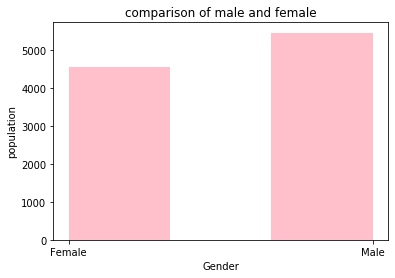

In [5]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [6]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

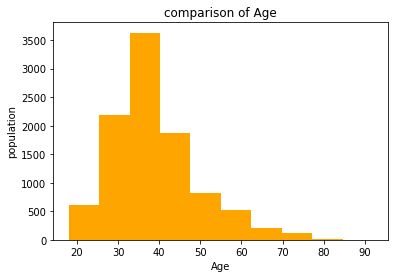

In [7]:
# comparison of age in the dataset

plt.hist(x = data.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

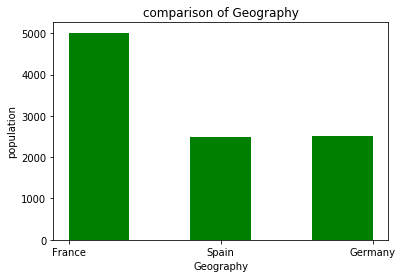

In [9]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [10]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

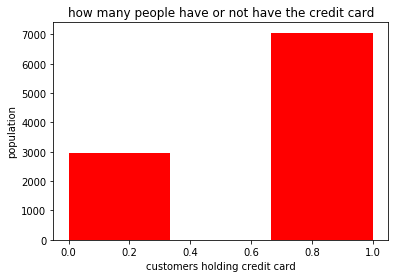

In [11]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [12]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

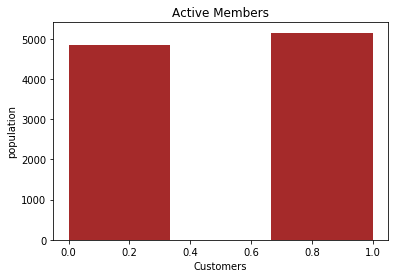

In [13]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

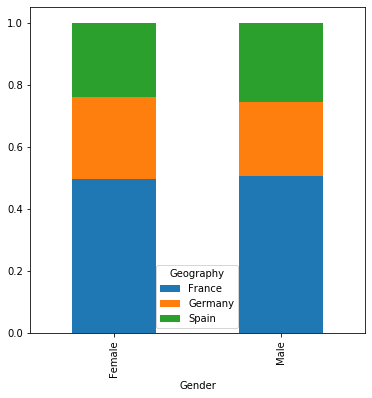

In [14]:
# comparison between Geography and Gender

Gender = pd.crosstab(data['Gender'],data['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))



In [16]:
# calculating total balance in france, germany and spain

total_france = data.Balance[data.Geography == 'France'].sum()
total_germany = data.Balance[data.Geography == 'Germany'].sum()
total_spain = data.Balance[data.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)


Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


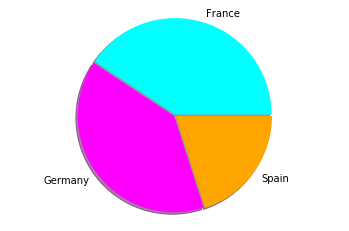

In [17]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

## Data Preprocessing

In [20]:
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values

X is here our Matrix of feature(independent variables) and 
y (actual value): exited, this is the value we are trying to predict, which means if the customer stays or exit the bank.

 **Encoding categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building of ANN

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


Epoch 1/100
8000/8000 [==============================] - 2s - loss: 0.4849 - acc: 0.7957     
Epoch 2/100
8000/8000 [==============================] - 2s - loss: 0.4271 - acc: 0.7960     
Epoch 3/100
8000/8000 [==============================] - 2s - loss: 0.4208 - acc: 0.8016     
Epoch 4/100
8000/8000 [==============================] - 2s - loss: 0.4175 - acc: 0.8232     
Epoch 5/100
8000/8000 [==============================] - 2s - loss: 0.4155 - acc: 0.8285     
Epoch 6/100
8000/8000 [==============================] - 2s - loss: 0.4134 - acc: 0.8309     
Epoch 7/100
8000/8000 [==============================] - 2s - loss: 0.4121 - acc: 0.8317     
Epoch 8/100
8000/8000 [==============================] - 2s - loss: 0.4107 - acc: 0.8334     
Epoch 9/100
8000/8000 [==============================] - 2s - loss: 0.4103 - acc: 0.8346     
Epoch 10/100
8000/8000 [==============================] - 2s - loss: 0.4091 - acc: 0.8340     
Epoch 11/100
8000/8000 [==============================] - 2s - loss: 0.4078 - acc: 0.8350     
Epoch 12/100
8000/8000 [==============================] - 2s - loss: 0.4072 - acc: 0.8340     
Epoch 13/100
8000/8000 [==============================] - 2s - loss: 0.4065 - acc: 0.8344     
Epoch 14/100
8000/8000 [==============================] - 2s - loss: 0.4065 - acc: 0.8349     
Epoch 15/100
8000/8000 [==============================] - 2s - loss: 0.4057 - acc: 0.8355     
Epoch 16/100
8000/8000 [==============================] - 2s - loss: 0.4050 - acc: 0.8340     
Epoch 17/100
8000/8000 [==============================] - 2s - loss: 0.4049 - acc: 0.8354     
Epoch 18/100
8000/8000 [==============================] - 2s - loss: 0.4040 - acc: 0.8332     
Epoch 19/100
8000/8000 [==============================] - 2s - loss: 0.4028 - acc: 0.8352     
Epoch 20/100
8000/8000 [==============================] - 2s - loss: 0.4022 - acc: 0.8356     
Epoch 21/100
8000/8000 [==============================] - 2s - loss: 0.4013 - acc: 0.8360     
Epoch 22/100
8000/8000 [==============================] - 2s - loss: 0.4007 - acc: 0.8352     
Epoch 23/100
8000/8000 [==============================] - 2s - loss: 0.3999 - acc: 0.8364     
Epoch 24/100
8000/8000 [==============================] - 2s - loss: 0.3999 - acc: 0.8361     
Epoch 25/100
8000/8000 [==============================] - 2s - loss: 0.3990 - acc: 0.8344     
Epoch 26/100
8000/8000 [==============================] - 2s - loss: 0.3985 - acc: 0.8359     
Epoch 27/100
8000/8000 [==============================] - 2s - loss: 0.3977 - acc: 0.8354     
Epoch 28/100
8000/8000 [==============================] - 2s - loss: 0.3975 - acc: 0.8351     
Epoch 29/100
8000/8000 [==============================] - 2s - loss: 0.3975 - acc: 0.8344     
Epoch 30/100
8000/8000 [==============================] - 2s - loss: 0.3975 - acc: 0.8350     
Epoch 31/100
8000/8000 [==============================] - 2s - loss: 0.3967 - acc: 0.8354     
Epoch 32/100
8000/8000 [==============================] - 2s - loss: 0.3965 - acc: 0.8342     
Epoch 33/100
8000/8000 [==============================] - 2s - loss: 0.3964 - acc: 0.8354     
Epoch 34/100
8000/8000 [==============================] - 2s - loss: 0.3964 - acc: 0.8359     
Epoch 35/100
8000/8000 [==============================] - 2s - loss: 0.3962 - acc: 0.8356     
Epoch 36/100
8000/8000 [==============================] - 2s - loss: 0.3958 - acc: 0.8367     
Epoch 37/100
8000/8000 [==============================] - 2s - loss: 0.3953 - acc: 0.8364     
Epoch 38/100
8000/8000 [==============================] - 2s - loss: 0.3958 - acc: 0.8355     
Epoch 39/100
8000/8000 [==============================] - 2s - loss: 0.3954 - acc: 0.8380     
Epoch 40/100
8000/8000 [==============================] - 2s - loss: 0.3954 - acc: 0.8366     
Epoch 41/100
8000/8000 [==============================] - 2s - loss: 0.3954 - acc: 0.8340     
Epoch 42/100
8000/8000 [==============================] - 2s - loss: 0.3952 - acc: 0.8362     
Epoch 43/100
8000/8000 [==============================] - 2s - loss: 0.3947 - acc: 0.8350     
Epoch 44/100
8000/8000 [==============================] - 2s - loss: 0.3951 - acc: 0.8362     
Epoch 45/100
8000/8000 [==============================] - 2s - loss: 0.3945 - acc: 0.8356     
Epoch 46/100
8000/8000 [==============================] - 2s - loss: 0.3949 - acc: 0.8354     
Epoch 47/100
8000/8000 [==============================] - 2s - loss: 0.3952 - acc: 0.8366     
Epoch 48/100
8000/8000 [==============================] - 2s - loss: 0.3950 - acc: 0.8377     
Epoch 49/100
8000/8000 [==============================] - 2s - loss: 0.3942 - acc: 0.8359     
Epoch 50/100
8000/8000 [==============================] - 2s - loss: 0.3944 - acc: 0.8357     
Epoch 51/100
8000/8000 [==============================] - 2s - loss: 0.3947 - acc: 0.8359     
Epoch 52/100
8000/8000 [==============================] - 3s - loss: 0.3944 - acc: 0.8379     
Epoch 53/100
8000/8000 [==============================] - 3s - loss: 0.3946 - acc: 0.8365     
Epoch 54/100
8000/8000 [==============================] - 3s - loss: 0.3946 - acc: 0.8366     
Epoch 55/100
8000/8000 [==============================] - 2s - loss: 0.3943 - acc: 0.8356     
Epoch 56/100
8000/8000 [==============================] - 2s - loss: 0.3944 - acc: 0.8352     
Epoch 57/100
8000/8000 [==============================] - 2s - loss: 0.3948 - acc: 0.8371     
Epoch 58/100
8000/8000 [==============================] - 3s - loss: 0.3940 - acc: 0.8371     
Epoch 59/100
8000/8000 [==============================] - 3s - loss: 0.3944 - acc: 0.8361     
Epoch 60/100
8000/8000 [==============================] - 3s - loss: 0.3941 - acc: 0.8361     
Epoch 61/100
8000/8000 [==============================] - 2s - loss: 0.3942 - acc: 0.8367     
Epoch 62/100
8000/8000 [==============================] - 2s - loss: 0.3933 - acc: 0.8372     
Epoch 63/100
8000/8000 [==============================] - 2s - loss: 0.3940 - acc: 0.8366     
Epoch 64/100
8000/8000 [==============================] - 2s - loss: 0.3937 - acc: 0.8362     
Epoch 65/100
8000/8000 [==============================] - 2s - loss: 0.3938 - acc: 0.8365     
Epoch 66/100
8000/8000 [==============================] - 2s - loss: 0.3929 - acc: 0.8377     
Epoch 67/100
8000/8000 [==============================] - 2s - loss: 0.3934 - acc: 0.8361     
Epoch 68/100
8000/8000 [==============================] - 2s - loss: 0.3936 - acc: 0.8350     
Epoch 69/100
8000/8000 [==============================] - 2s - loss: 0.3930 - acc: 0.8370     
Epoch 70/100
8000/8000 [==============================] - 2s - loss: 0.3922 - acc: 0.8376     
Epoch 71/100
8000/8000 [==============================] - 2s - loss: 0.3921 - acc: 0.8374     
Epoch 72/100
8000/8000 [==============================] - 2s - loss: 0.3919 - acc: 0.8381     
Epoch 73/100
8000/8000 [==============================] - 2s - loss: 0.3918 - acc: 0.8375     
Epoch 74/100
8000/8000 [==============================] - 2s - loss: 0.3910 - acc: 0.8380     
Epoch 75/100
8000/8000 [==============================] - 3s - loss: 0.3907 - acc: 0.8375     
Epoch 76/100
8000/8000 [==============================] - 3s - loss: 0.3902 - acc: 0.8386     
Epoch 77/100
8000/8000 [==============================] - 2s - loss: 0.3897 - acc: 0.8380     
Epoch 78/100
8000/8000 [==============================] - 2s - loss: 0.3892 - acc: 0.8386     
Epoch 79/100
8000/8000 [==============================] - 2s - loss: 0.3873 - acc: 0.8389     
Epoch 80/100
8000/8000 [==============================] - 2s - loss: 0.3848 - acc: 0.8386     
Epoch 81/100
8000/8000 [==============================] - 2s - loss: 0.3818 - acc: 0.8377     
Epoch 82/100
8000/8000 [==============================] - 2s - loss: 0.3790 - acc: 0.8381     
Epoch 83/100
8000/8000 [==============================] - 2s - loss: 0.3749 - acc: 0.8396     
Epoch 84/100
8000/8000 [==============================] - 2s - loss: 0.3701 - acc: 0.8419     
Epoch 85/100
8000/8000 [==============================] - 2s - loss: 0.3665 - acc: 0.8437     
Epoch 86/100
8000/8000 [==============================] - 2s - loss: 0.3641 - acc: 0.8452     
Epoch 87/100
8000/8000 [==============================] - 2s - loss: 0.3616 - acc: 0.8467     
Epoch 88/100
8000/8000 [==============================] - 2s - loss: 0.3598 - acc: 0.8511     
Epoch 89/100
8000/8000 [==============================] - 2s - loss: 0.3583 - acc: 0.8512     
Epoch 90/100
8000/8000 [==============================] - 2s - loss: 0.3576 - acc: 0.8530     
Epoch 91/100
8000/8000 [==============================] - 2s - loss: 0.3565 - acc: 0.8536     
Epoch 92/100
8000/8000 [==============================] - 2s - loss: 0.3554 - acc: 0.8545     
Epoch 93/100
8000/8000 [==============================] - 2s - loss: 0.3534 - acc: 0.8545     
Epoch 94/100
8000/8000 [==============================] - 2s - loss: 0.3527 - acc: 0.8560     
Epoch 95/100
8000/8000 [==============================] - 2s - loss: 0.3514 - acc: 0.8555     
Epoch 96/100
8000/8000 [==============================] - 2s - loss: 0.3498 - acc: 0.8557     
Epoch 97/100
8000/8000 [==============================] - 2s - loss: 0.3496 - acc: 0.8585     
Epoch 98/100
8000/8000 [==============================] - 2s - loss: 0.3489 - acc: 0.8584     
Epoch 99/100
8000/8000 [==============================] - 2s - loss: 0.3479 - acc: 0.8589     
Epoch 100/100
8000/8000 [==============================] - 2s - loss: 0.3478 - acc: 0.8577

## Predicting our Test Results

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Predicting a single new observation
"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
array([[1503,   92],
       [ 189,  216]])

## Evaluating, Improving and Tuning the ANN
-Using K-Fold Cross validation with Keras


In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
mean = accuracies.mean()
variance = accuracies.std()

In [ ]:
mean = 0.

Drop out regularization: A solution for overfitting - high variance

At each iteration of training, some neurons of your artificial neural network are randomly disabled to prevent them from being too dependent on each other when they learn the correlations
Therefore, by overwriting these neurons, the ANN learn several independent correlations in the data because each time there is not the same configuration of the neurons.
The fact that we get these independent correlations of the data, meaning the neurons work more independently, that prevents the neuron from learning too much and therefore overfitting.
Using Dropout() argument:

p: the fraction of the input units you want to drop/disable at each iteration. For example: if we have 10 neurons, p=0.1 (10%), this means at each iteration, 1 neuron will be disabled.

In [ ]:
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    # classifier.add(Dropout(p = 0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    # classifier.add(Dropout(p = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [ ]:
best_accuracy = 0.85348
best_parameters="batch_size"=25,"epochs"=500, "optimizer"=rmsprop

#                                          THANK YOU